In [1]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from matplotlib import pyplot as plt
%matplotlib inline
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator 
from PIL import Image
from numpy import asarray
from helper import plot_history


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Initialise an image generator object
generator = ImageDataGenerator(rescale=1./255)

# Initialising number of data images
num_data = len(os.listdir('data/pavlos') + 
               os.listdir('data/not_pavlos'))

# Read the image data from the directory using the generator object
img_generator = generator.flow_from_directory(directory="data", color_mode='rgb', seed=1,
                                    batch_size=16, target_size=(150, 150), class_mode='binary')

# Print the target size i.e. the total dataset size
TARGET_SIZE = img_generator.target_size
print(f'Generator produces images of size {TARGET_SIZE} (with 3 color channels)')

# Print the batch size
BATCH_SIZE = img_generator.batch_size
print(f'Images are generated in batches of size {BATCH_SIZE}')


Found 100 images belonging to 2 classes.
Generator produces images of size (150, 150) (with 3 color channels)
Images are generated in batches of size 16


In [0]:
img_generator

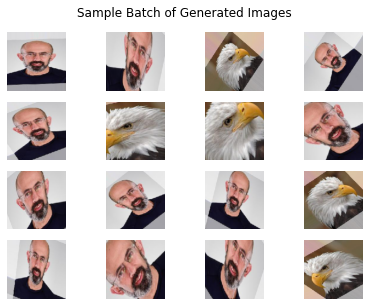

In [5]:
# Plotting a sample of the generated images 
sample_batch = img_generator.next()[0]
fig, ax = plt.subplots(4,4)
ax = ax.ravel()
for i, img in enumerate(sample_batch):
    ax[i].set_axis_off()
    ax[i].imshow(img)
plt.suptitle('Sample Batch of Generated Images', y=1.05)
plt.tight_layout()


### Feed-Forward Neural Network

Our first network will be a feed-forward neural network. The only layers with learned parameters we will be using are dense layers.

In [22]:
from keras.backend import dropout
# Fixing the random seed
seed(1)
tf.random.set_seed(1)

# Creating a feed-forward Neural Network
FFNN = Sequential()

# Specify a layer that takes the input with input shape
# the same as the size of the image defined during image generation
# Remember to take into account that the image has 3 channels
FFNN.add(Input(shape=(150,150,3)))

# Add a flatten layer to enable FFNN to process images
FFNN.add(tf.keras.layers.Flatten())

# Specify a list of the number of nodes for each dense layer
# ffnn_filters = [4096,2048,1024,512,128,64,32,4]
ffnn_filters = [8,8,8]
# Add dense layers for the number of nodes in ffnn_filters with ReLU activation
for n_nodes in ffnn_filters:
    FFNN.add(Dense(n_nodes,activation='ReLU'))
    FFNN.add(tf.keras.layers.Dropout(0.05))

# Add the final dense layer with 1 output node to differentiate 
# between the two classes and sigmoid activation
FFNN.add(Dense(1,activation='sigmoid'))

# Compile the model with accuracy as the metric and adam optimizer
opt = tf.keras.optimizers.Adam(lr=0.001)
FFNN.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
# Print a summary of the model and observe the total number of parameters
FFNN.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 67500)             0         
                                                                 
 dense_45 (Dense)            (None, 16)                1080016   
                                                                 
 dropout_39 (Dropout)        (None, 16)                0         
                                                                 
 dense_46 (Dense)            (None, 8)                 136       
                                                                 
 dropout_40 (Dropout)        (None, 8)                 0         
                                                                 
 dense_47 (Dense)            (None, 8)                 72        
                                                                 
 dropout_41 (Dropout)        (None, 8)                

In [23]:
# Train the model
FFNN_history = FFNN.fit(
        img_generator,
        steps_per_epoch=num_data// BATCH_SIZE,
        epochs=20, shuffle=False, workers=0,
        validation_data=img_generator,
        validation_steps=num_data*0.25// BATCH_SIZE)
        

Epoch 1/100
6/6 [==============================] - 1s 124ms/step - loss: 3.5699 - accuracy: 0.4375 - val_loss: 3.1491 - val_accuracy: 0.3750
Epoch 2/100
6/6 [==============================] - 0s 83ms/step - loss: 1.7641 - accuracy: 0.6042 - val_loss: 0.6378 - val_accuracy: 0.6250
Epoch 3/100
6/6 [==============================] - 0s 85ms/step - loss: 0.6464 - accuracy: 0.5625 - val_loss: 0.5360 - val_accuracy: 0.5625
Epoch 4/100
6/6 [==============================] - 0s 78ms/step - loss: 0.9911 - accuracy: 0.6146 - val_loss: 0.6080 - val_accuracy: 0.7500
Epoch 5/100
6/6 [==============================] - 0s 82ms/step - loss: 0.9588 - accuracy: 0.6979 - val_loss: 0.3331 - val_accuracy: 0.8125
Epoch 6/100
6/6 [==============================] - 0s 79ms/step - loss: 0.7799 - accuracy: 0.8229 - val_loss: 0.3521 - val_accuracy: 0.9375
Epoch 7/100
6/6 [==============================] - 0s 80ms/step - loss: 0.7303 - accuracy: 0.7604 - val_loss: 0.3249 - val_accuracy: 0.9375
Epoch 8/100
6/6 [==

### ⏸ Enter the number of parameters in the given FFNN architecture.

In [18]:
### edTest(test_chow1) ###
# Enter the answer by typing in a number in the space provided
answer1 = '405047'


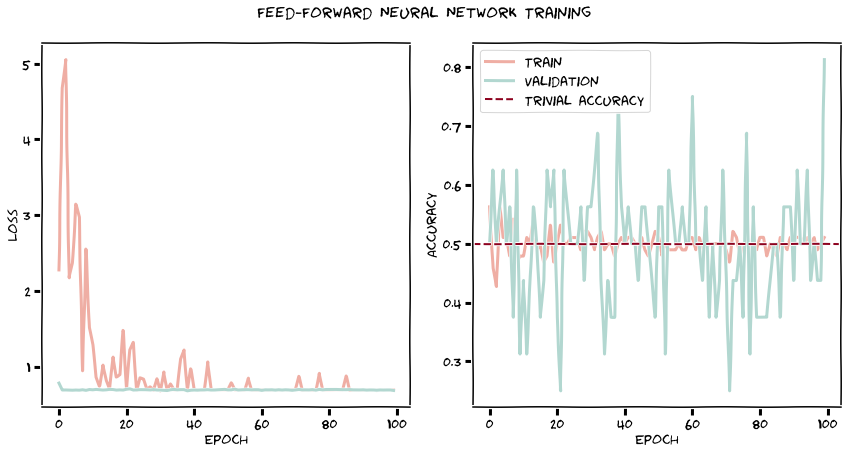

In [19]:
# Use the plot history function from the helper file to plot the data
plot_history(FFNN_history, 'Feed-Forward Neural Network')


In [20]:
### edTest(test_ffnn_acc) ###

# Evaluate your model
FFNN_loss, FFNN_acc = FFNN.evaluate(img_generator, steps=2)
print(f'FFNN Accuracy: {FFNN_acc}')


2/2 [==============================] - 0s 69ms/step - loss: 0.6926 - accuracy: 0.5312
FFNN Accuracy: 0.53125


### ⏸ Alter the network architecture by increasing the number of nodes and/or layers. Enter the number of parameters of the network that gives a validation accuracy of above 80%.

In [25]:
### edTest(test_chow2) ###
# Enter the answer by typing in a number in the space provided
answer2 = '1,080,233'


### Convolutional Neural Network

In [38]:
### edTest(test_cnn_count_param) ###

# Fixing the random seed
seed(1)
tf.random.set_seed(1)

# Creating a CNN
CNN = Sequential()

# Add a layer to take the input with shape (150,150,3)
CNN.add(Input(shape=(150,150,3)))

# Specify a list of the number of filters for each convolutional layer
cnn_filters = [8,8,8,8,8]

# Add convolutional layers with number of filters in cnn_filters
# with kernel size as 3, stride of 2 and relu activation
for n_filters in cnn_filters:
    CNN.add(Conv2D(n_filters,kernel_size=(3,3),strides=2,activation='relu'))

# Add the flatten layer between the CNN and dense layer
CNN.add(Flatten())

# Add a dense layer with 64 nodes and relu activation
CNN.add(Dense(64,activation='relu'))
 
# Specify the output layer with sigmoid activation and one node
CNN.add(Dense(1,activation='sigmoid'))
 
# Compile the model with accuracy as the metric and adam optimizer
opt = tf.keras.optimizers.Adam(lr=0.001)
CNN.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
# Print a summary of the model and observe the total number of parameters
CNN.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 74, 74, 8)         224       
                                                                 
 conv2d_20 (Conv2D)          (None, 36, 36, 8)         584       
                                                                 
 conv2d_21 (Conv2D)          (None, 17, 17, 8)         584       
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 8)           584       
                                                                 
 flatten_10 (Flatten)        (None, 72)                0         
                                                                 
 dense_55 (Dense)            (None, 64)              

### ⏸ Enter the number of parameters in the given CNN architecture.


In [29]:
### edTest(test_chow3) ###

# Enter the answer by typing in a number in the space provided
answer3 = '7297'


In [33]:
# Fit the model on the image generator
CNN_history = CNN.fit(
        img_generator,
        steps_per_epoch=num_data // BATCH_SIZE,
        epochs=10, shuffle=False, workers=0,
        validation_data=img_generator,
        validation_steps=num_data*0.25// BATCH_SIZE)
        

Epoch 1/10
6/6 [==============================] - 10s 131ms/step - loss: 0.6925 - accuracy: 0.4896 - val_loss: 0.6881 - val_accuracy: 0.5625
Epoch 2/10
6/6 [==============================] - 0s 84ms/step - loss: 0.6864 - accuracy: 0.6771 - val_loss: 0.6776 - val_accuracy: 0.8750
Epoch 3/10
6/6 [==============================] - 1s 86ms/step - loss: 0.6745 - accuracy: 0.8125 - val_loss: 0.6634 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 83ms/step - loss: 0.6480 - accuracy: 0.9271 - val_loss: 0.6183 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 82ms/step - loss: 0.5997 - accuracy: 0.9167 - val_loss: 0.5423 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 81ms/step - loss: 0.5034 - accuracy: 1.0000 - val_loss: 0.4067 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 1s 87ms/step - loss: 0.3378 - accuracy: 0.9896 - val_loss: 0.2075 - val_accuracy: 1.0000
Epoch 8/10
6/6 [=========

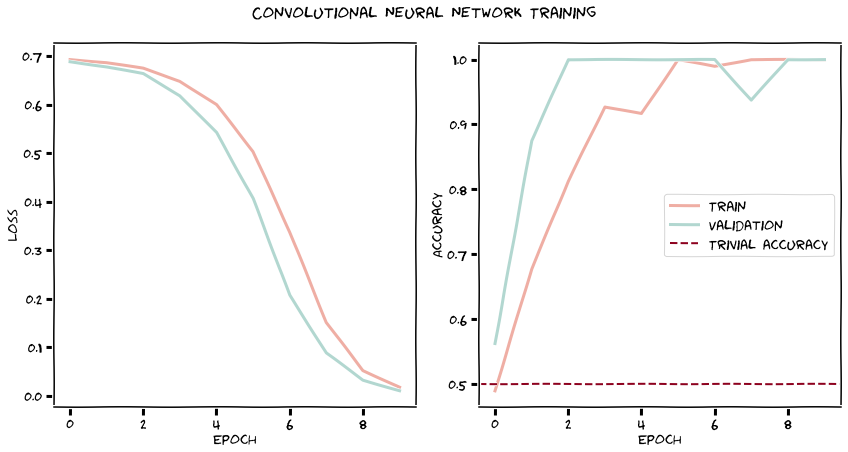

In [34]:
# Plot the history of the model
plot_history(CNN_history, 'Convolutional Neural Network')


In [35]:
### edTest(test_cnn_acc) ###

# Evaluate the model on the entire data
CNN_loss, CNN_acc = CNN.evaluate(img_generator, steps=2)
print(f'CNN Test Accuracy: {CNN_acc}')


2/2 [==============================] - 0s 69ms/step - loss: 0.0038 - accuracy: 1.0000
CNN Test Accuracy: 1.0


### ⏸ Remove the last convolution layer in the Convolution Neural Network defined above. How does this affect the number of parameters?

#### A. The number of parameters decrease.
#### B. The number of parameters increase.
#### C. The number of parameters remains the same. 


In [40]:
### edTest(test_chow4) ###

# Enter the answer by typing in a number in the space provided
answer4 = 'B'
